In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot

In [ ]:
!pip install keras-rectified-adam

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
%env TF_KERAS = 1
from keras_radam import RAdam

import pathlib
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import classification_report

from tensorflow.keras.layers import Input
#from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import Embedding

print(tf.__version__)

env: TF_KERAS=1
1.13.1


In [2]:
column_names = ['MAKTG',
                'EXSID'                
               ]

In [146]:
df = pd.read_csv('htsdata_train.csv',
        header=0,
        na_values = '0',
        usecols=column_names,
        comment='\t',
        skipinitialspace=True)
df = df.replace(0, np.nan)
dataset = df.copy()
dataset.head()

,MAKTG,EXSID
0,ADVIL ALLERGY CONGESTION RELIEF TAB 20CT,A142
1,BUPIVAC 0.25% 30ML SSOL 1X25 TTV,A137
2,IDAMYCIN 1MG/ML SSOL 1X20ML PVL US,A114
3,CALTRATE 600+D 60,A145
4,PNIN: PHENYTOIN SODIUM (INJ),A134


In [147]:
MAKTG = dataset["MAKTG"].value_counts().keys().tolist()

In [148]:
EXSID = dataset.pop('EXSID')
dataset['A0'] = (EXSID == 'A0')*1.0
dataset['A1'] = (EXSID == 'A1')*1.0
dataset['A2'] = (EXSID == 'A2')*1.0
dataset['A3'] = (EXSID == 'A3')*1.0
dataset['A4'] = (EXSID == 'A4')*1.0
dataset['A5'] = (EXSID == 'A5')*1.0
dataset['A6'] = (EXSID == 'A6')*1.0
dataset['A7'] = (EXSID == 'A7')*1.0
dataset['A8'] = (EXSID == 'A8')*1.0
dataset['A9'] = (EXSID == 'A9')*1.0
dataset['A10'] = (EXSID == 'A10')*1.0
dataset['A11'] = (EXSID == 'A11')*1.0
dataset['A12'] = (EXSID == 'A12')*1.0
dataset['A13'] = (EXSID == 'A13')*1.0
dataset['A14'] = (EXSID == 'A14')*1.0
dataset['A15'] = (EXSID == 'A15')*1.0
dataset['A16'] = (EXSID == 'A16')*1.0
dataset['A17'] = (EXSID == 'A17')*1.0
dataset['A18'] = (EXSID == 'A18')*1.0
dataset['A19'] = (EXSID == 'A19')*1.0
dataset['A20'] = (EXSID == 'A20')*1.0
dataset['A21'] = (EXSID == 'A21')*1.0
dataset['A22'] = (EXSID == 'A22')*1.0
dataset['A23'] = (EXSID == 'A23')*1.0
dataset['A24'] = (EXSID == 'A24')*1.0
dataset['A25'] = (EXSID == 'A25')*1.0
dataset['A26'] = (EXSID == 'A26')*1.0
dataset['A27'] = (EXSID == 'A27')*1.0
dataset['A28'] = (EXSID == 'A28')*1.0
dataset['A29'] = (EXSID == 'A29')*1.0
dataset['A30'] = (EXSID == 'A30')*1.0
dataset['A31'] = (EXSID == 'A31')*1.0
dataset['A32'] = (EXSID == 'A32')*1.0
dataset['A33'] = (EXSID == 'A33')*1.0
dataset['A34'] = (EXSID == 'A34')*1.0
dataset['A35'] = (EXSID == 'A35')*1.0
dataset['A36'] = (EXSID == 'A36')*1.0
dataset['A37'] = (EXSID == 'A37')*1.0
dataset['A38'] = (EXSID == 'A38')*1.0
dataset['A39'] = (EXSID == 'A39')*1.0
dataset['A40'] = (EXSID == 'A40')*1.0
dataset['A41'] = (EXSID == 'A41')*1.0
dataset['A42'] = (EXSID == 'A42')*1.0
dataset['A43'] = (EXSID == 'A43')*1.0
dataset['A44'] = (EXSID == 'A44')*1.0
dataset['A45'] = (EXSID == 'A45')*1.0
dataset['A46'] = (EXSID == 'A46')*1.0
dataset['A47'] = (EXSID == 'A47')*1.0
dataset['A48'] = (EXSID == 'A48')*1.0
dataset['A49'] = (EXSID == 'A49')*1.0
dataset['A50'] = (EXSID == 'A50')*1.0
dataset['A51'] = (EXSID == 'A51')*1.0
dataset['A52'] = (EXSID == 'A52')*1.0
dataset['A53'] = (EXSID == 'A53')*1.0
dataset['A54'] = (EXSID == 'A54')*1.0
dataset['A55'] = (EXSID == 'A55')*1.0
dataset['A56'] = (EXSID == 'A56')*1.0
dataset['A57'] = (EXSID == 'A57')*1.0
dataset['A58'] = (EXSID == 'A58')*1.0
dataset['A59'] = (EXSID == 'A59')*1.0
dataset['A60'] = (EXSID == 'A60')*1.0
dataset['A61'] = (EXSID == 'A61')*1.0
dataset['A62'] = (EXSID == 'A62')*1.0
dataset['A63'] = (EXSID == 'A63')*1.0
dataset['A64'] = (EXSID == 'A64')*1.0
dataset['A65'] = (EXSID == 'A65')*1.0
dataset['A66'] = (EXSID == 'A66')*1.0
dataset['A67'] = (EXSID == 'A67')*1.0
dataset['A68'] = (EXSID == 'A68')*1.0
dataset['A69'] = (EXSID == 'A69')*1.0
dataset['A70'] = (EXSID == 'A70')*1.0
dataset['A71'] = (EXSID == 'A71')*1.0
dataset['A72'] = (EXSID == 'A72')*1.0
dataset['A73'] = (EXSID == 'A73')*1.0
dataset['A74'] = (EXSID == 'A74')*1.0
dataset['A75'] = (EXSID == 'A75')*1.0
dataset['A76'] = (EXSID == 'A76')*1.0
dataset['A77'] = (EXSID == 'A77')*1.0
dataset['A78'] = (EXSID == 'A78')*1.0
dataset['A79'] = (EXSID == 'A79')*1.0
dataset['A80'] = (EXSID == 'A80')*1.0
dataset['A81'] = (EXSID == 'A81')*1.0
dataset['A82'] = (EXSID == 'A82')*1.0
dataset['A83'] = (EXSID == 'A83')*1.0
dataset['A84'] = (EXSID == 'A84')*1.0
dataset['A85'] = (EXSID == 'A85')*1.0
dataset['A86'] = (EXSID == 'A86')*1.0
dataset['A87'] = (EXSID == 'A87')*1.0
dataset['A88'] = (EXSID == 'A88')*1.0
dataset['A89'] = (EXSID == 'A89')*1.0
dataset['A90'] = (EXSID == 'A90')*1.0
dataset['A91'] = (EXSID == 'A91')*1.0
dataset['A92'] = (EXSID == 'A92')*1.0
dataset['A93'] = (EXSID == 'A93')*1.0
dataset['A94'] = (EXSID == 'A94')*1.0
dataset['A95'] = (EXSID == 'A95')*1.0
dataset['A96'] = (EXSID == 'A96')*1.0
dataset['A97'] = (EXSID == 'A97')*1.0
dataset['A98'] = (EXSID == 'A98')*1.0
dataset['A99'] = (EXSID == 'A99')*1.0
dataset['A100'] = (EXSID == 'A100')*1.0
dataset['A101'] = (EXSID == 'A101')*1.0
dataset['A102'] = (EXSID == 'A102')*1.0
dataset['A103'] = (EXSID == 'A103')*1.0
dataset['A104'] = (EXSID == 'A104')*1.0
dataset['A105'] = (EXSID == 'A105')*1.0
dataset['A106'] = (EXSID == 'A106')*1.0
dataset['A107'] = (EXSID == 'A107')*1.0
dataset['A108'] = (EXSID == 'A108')*1.0
dataset['A109'] = (EXSID == 'A109')*1.0
dataset['A110'] = (EXSID == 'A110')*1.0
dataset['A111'] = (EXSID == 'A111')*1.0
dataset['A112'] = (EXSID == 'A112')*1.0
dataset['A113'] = (EXSID == 'A113')*1.0
dataset['A114'] = (EXSID == 'A114')*1.0
dataset['A115'] = (EXSID == 'A115')*1.0
dataset['A116'] = (EXSID == 'A116')*1.0
dataset['A117'] = (EXSID == 'A117')*1.0
dataset['A118'] = (EXSID == 'A118')*1.0
dataset['A119'] = (EXSID == 'A119')*1.0
dataset['A120'] = (EXSID == 'A120')*1.0
dataset['A121'] = (EXSID == 'A121')*1.0
dataset['A122'] = (EXSID == 'A122')*1.0
dataset['A123'] = (EXSID == 'A123')*1.0
dataset['A124'] = (EXSID == 'A124')*1.0
dataset['A125'] = (EXSID == 'A125')*1.0
dataset['A126'] = (EXSID == 'A126')*1.0
dataset['A127'] = (EXSID == 'A127')*1.0
dataset['A128'] = (EXSID == 'A128')*1.0
dataset['A129'] = (EXSID == 'A129')*1.0
dataset['A130'] = (EXSID == 'A130')*1.0
dataset['A131'] = (EXSID == 'A131')*1.0
dataset['A132'] = (EXSID == 'A132')*1.0
dataset['A133'] = (EXSID == 'A133')*1.0
dataset['A134'] = (EXSID == 'A134')*1.0
dataset['A135'] = (EXSID == 'A135')*1.0
dataset['A136'] = (EXSID == 'A136')*1.0
dataset['A137'] = (EXSID == 'A137')*1.0
dataset['A138'] = (EXSID == 'A138')*1.0
dataset['A139'] = (EXSID == 'A139')*1.0
dataset['A140'] = (EXSID == 'A140')*1.0
dataset['A141'] = (EXSID == 'A141')*1.0
dataset['A142'] = (EXSID == 'A142')*1.0
dataset['A143'] = (EXSID == 'A143')*1.0
dataset['A144'] = (EXSID == 'A144')*1.0
dataset['A145'] = (EXSID == 'A145')*1.0
dataset['A146'] = (EXSID == 'A146')*1.0
dataset['A147'] = (EXSID == 'A147')*1.0
dataset['A148'] = (EXSID == 'A148')*1.0
dataset['A149'] = (EXSID == 'A149')*1.0
dataset['A150'] = (EXSID == 'A150')*1.0
dataset['A151'] = (EXSID == 'A151')*1.0
dataset['A152'] = (EXSID == 'A152')*1.0
dataset['A153'] = (EXSID == 'A153')*1.0
dataset['A154'] = (EXSID == 'A154')*1.0
dataset['A155'] = (EXSID == 'A155')*1.0
dataset['A156'] = (EXSID == 'A156')*1.0
dataset['A157'] = (EXSID == 'A157')*1.0
dataset['A158'] = (EXSID == 'A158')*1.0
dataset['A159'] = (EXSID == 'A159')*1.0
dataset['A160'] = (EXSID == 'A160')*1.0
dataset['A161'] = (EXSID == 'A161')*1.0
dataset['A162'] = (EXSID == 'A162')*1.0
dataset['A163'] = (EXSID == 'A163')*1.0
dataset['A164'] = (EXSID == 'A164')*1.0
dataset['A165'] = (EXSID == 'A165')*1.0
dataset['A166'] = (EXSID == 'A166')*1.0
dataset['A167'] = (EXSID == 'A167')*1.0
dataset['A168'] = (EXSID == 'A168')*1.0
dataset['A169'] = (EXSID == 'A169')*1.0

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset["MAKTG"].values, dataset.drop(['MAKTG'],axis=1).values, test_size=0.2, random_state=42)

In [150]:
y_train.shape

(6931, 170)

In [151]:
#tokenizer = Tokenizer(num_words=20000)
#tokenizer.fit_on_texts(X_train)

#X_train = tokenizer.texts_to_sequences(X_train)
#X_test = tokenizer.texts_to_sequences(X_test)

#vocab_size = len(tokenizer.word_index) + 1

maxlen = 50

#X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
#X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


vocabulary_size = 20000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(sequences, maxlen=maxlen)

sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences, maxlen=maxlen)

In [152]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

3993

In [153]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()
print('Loaded %s word vectors.' % len(embeddings_dictionary))

Loaded 400000 word vectors.


In [154]:
embedding_matrix = zeros((vocab_size, 100))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [155]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)

In [156]:
numclass=170

model = Sequential()
#model.add(Embedding(20000, 100, input_length=50))

e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)

model.add(e)
model.add(Dropout(0.2))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(256))
model.add(Dense(numclass, activation='softmax'))

In [157]:
opt = 'adam'
#opt  = RAdam(total_steps=5000, warmup_proportion=0.1, min_lr=1e-5)

In [158]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [159]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 50, 100)           399300    
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 46, 64)            32064     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 23, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dense_3 (Dense)              (None, 170)               43690     
Total params: 803,758
Trainable params: 404,458
Non-trainable params: 399,300
________________________________________________________________

In [160]:
X_train.shape, y_train.shape

((6931, 50), (6931, 170))

In [ ]:
EPOCHS = 200
H = model.fit(X_train, y_train,
                    batch_size=1024,
                    epochs=EPOCHS,
                    verbose=1,
                    validation_split=0.1)

Train on 6237 samples, validate on 694 samples
Epoch 1/200
6237/6237 [==============================] - 10s 2ms/sample - loss: 4.9177 - acc: 0.1068 - val_loss: 4.3934 - val_acc: 0.1527
Epoch 2/200
6237/6237 [==============================] - 8s 1ms/sample - loss: 3.8793 - acc: 0.1395 - val_loss: 3.4567 - val_acc: 0.1009
Epoch 3/200
6237/6237 [==============================] - 8s 1ms/sample - loss: 3.3877 - acc: 0.1565 - val_loss: 3.3092 - val_acc: 0.1787
Epoch 4/200
6237/6237 [==============================] - 8s 1ms/sample - loss: 3.2289 - acc: 0.2120 - val_loss: 3.1477 - val_acc: 0.1744
Epoch 5/200
6237/6237 [==============================] - 8s 1ms/sample - loss: 3.0454 - acc: 0.2394 - val_loss: 2.9741 - val_acc: 0.2983
Epoch 6/200
6237/6237 [==============================] - 8s 1ms/sample - loss: 2.8340 - acc: 0.3195 - val_loss: 2.7312 - val_acc: 0.3876
Epoch 7/200
6237/6237 [==============================] - 8s 1ms/sample - loss: 2.6033 - acc: 0.3826 - val_loss: 2.5810 - val_acc: 

In [132]:
score = model.evaluate(X_test, y_test,
                       batch_size=256, verbose=1)
print('Test accuracy:', score[1])

1733/1733 [==============================] - 0s 216us/sample - loss: 0.9465 - acc: 0.7830
Test accuracy: 0.7830352


In [133]:
sequences = tokenizer.texts_to_sequences(['DIKETO ACID UNMILLED'])
X_test_testing = pad_sequences(sequences, maxlen=50)
X_test_testing

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 2615,  673, 1077]], dtype=int32)

In [134]:
preds1 = model.predict(X_test_testing)

In [135]:
np.argmax(preds1[0])

80

In [136]:
# creates a HDF5 file 'LRA.h5'
model.save('HTS_Glove.h5')
# Save the model architecture
with open('HTS_model_architecture_Glove.json', 'w') as f:
    f.write(model.to_json())

In [137]:
# Save Tokenizer i.e. Vocabulary
import pickle
with open('HTS_tokenizer_Glove.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [138]:
# ********************** PREDICTION ******************************************

In [139]:
# load tokenizer
import pickle
with open('HTS_tokenizer_Glove.pickle', 'rb') as handle:
    tokenizer1 = pickle.load(handle)

In [140]:
from tensorflow.keras.models import model_from_json

# Model reconstruction from JSON file
with open('HTS_model_architecture_Glove.json', 'r') as f:
    model1 = model_from_json(f.read())

# Load weights into the new model
model1.load_weights('HTS_Glove.h5')

In [141]:
sequences = tokenizer1.texts_to_sequences(['VAGISIL MEDICATED ANTI-ITCH WIPES 12 CT'])
X_test_testing = pad_sequences(sequences, maxlen=50)
X_test_testing

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0, 1776,  485,  283,  171,  278]], dtype=int32)

In [142]:
predsX = model1.predict(X_test_testing)

In [143]:
np.argmax(predsX[0])

137

In [144]:
###############################################################################

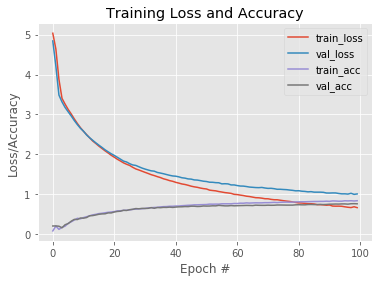

In [145]:
history = H
import matplotlib.pyplot as plt

N = np.arange(0, EPOCHS)
title = "Training Loss and Accuracy"
 
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()